In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from IPython.display import clear_output

import main

In [ ]:
result = main.run(total_periods = 1000000, learning_rate = 0.125, gamma = 0.95, beta =0.0002, alpha=2)

 23%|██▎       | 229757/1000000 [00:41<02:27, 5230.58it/s]

In [4]:
result.print_results()

alpha =  2  (1 is FPA, 2 is SPA) 
Name         Last_bid    Average Bid (last 2500 bids)    Average Payoff
---------  ----------  ------------------------------  ----------------
QLearning        0.83                        0.49952           0.268676
TitforTat        0.47                        0.608168          0.359772
Name       Description
---------  -------------------------------------------------------------------------------------------------------
QLearning  :  learning_rate=0.125, gamma=0.95, policy = (TimeDecliningExploration: beta = 0.0002, epsilon = 0.025)
TitforTat  Tit for Tat Price at: 0.95




In [4]:
result.env.action_space

array([0.05, 0.11, 0.17, 0.23, 0.29, 0.35, 0.41, 0.47, 0.53, 0.59, 0.65,
       0.71, 0.77, 0.83, 0.89, 0.95])

In [21]:
result.env.agents

[QLearning(Q={(0.05, 0.05): {0.05: 39.24146803959108, 0.10999999999999999: 39.05351647513507, 0.16999999999999998: 39.149364377284385, 0.22999999999999998: 39.11614316700133, 0.29: 39.080239038059055, 0.3499999999999999: 39.24966951745226, 0.4099999999999999: 39.04905730280007, 0.4699999999999999: 39.139269920404466, 0.5299999999999999: 39.14365782848454, 0.59: 39.1527262467046, 0.6499999999999999: 39.24564631974552, 0.71: 39.156657512882234, 0.7699999999999999: 39.18609777687937, 0.83: 39.235579210751645, 0.8899999999999999: 39.15442933617745, 0.95: 39.215092778744506}, (0.05, 0.10999999999999999): {0.05: 37.50834572123905, 0.10999999999999999: 37.090730446833845, 0.16999999999999998: 37.13584357809583, 0.22999999999999998: 37.74092162182039, 0.29: 36.74679821253055, 0.3499999999999999: 37.17127161755341, 0.4099999999999999: 37.797612210536336, 0.4699999999999999: 37.18766312872306, 0.5299999999999999: 37.835178720063325, 0.59: 36.392821542124764, 0.6499999999999999: 36.51012063203143

# Bid Price History

[0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95
 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95
 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95
 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95]


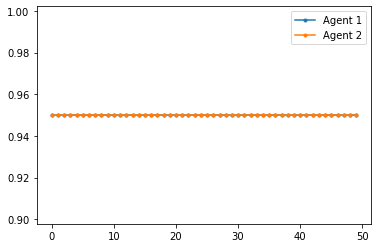

In [6]:
agent_1 = np.array(result.bid_history)[-50:,0]
agent_2 = np.array(result.bid_history)[-50:,1]
print(agent_1)
df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.plot(df,marker=".")
plt.legend(['Agent 1', "Agent 2"])
plt.show()

# Payoff History

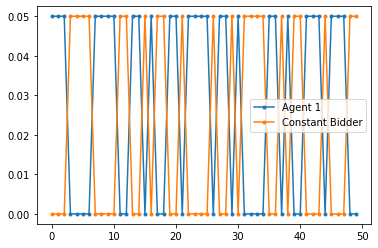

In [7]:
agent_1 = np.array(result.payoff_history)[-50:,0]
agent_2 = np.array(result.payoff_history)[-50:,1]
df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.plot(df,marker=".")
plt.legend(['Agent 1', "Constant Bidder"])
plt.show()

In [9]:
result.env.agents

[QLearning(Q={(0.05, 0.05): {0.05: 0, 0.09736842105263158: 0.16121226439763586, 0.14473684210526316: 0, 0.19210526315789472: 0.062292776903905604, 0.23947368421052628: 0, 0.28684210526315784: 0.36713657057224874, 0.33421052631578946: 0.3480969079743665, 0.381578947368421: 0.2932574412741867, 0.4289473684210526: 0.013720337553552444, 0.47631578947368414: 0.0650690893943332, 0.5236842105263158: 0.1786212580619412, 0.5710526315789474: 0, 0.618421052631579: 0.19341076054169865, 0.6657894736842105: 0.09261186402519582, 0.7131578947368421: 0.3121211348260272, 0.7605263157894736: 1.8473037181009895, 0.8078947368421052: 0.22121328921038658, 0.8552631578947368: 0, 0.9026315789473683: 0.06632093820024063, 0.95: 0}, (0.05, 0.09736842105263158): {0.05: 0.029567933361900896, 0.09736842105263158: 0, 0.14473684210526316: 0.18939074173767595, 0.19210526315789472: 0, 0.23947368421052628: 0, 0.28684210526315784: 0.22272877284819712, 0.33421052631578946: 0.3518372877293611, 0.381578947368421: 0.373802627

# keys with highest Qvalue average sorted

In [9]:
actions = result.env.action_space
new_dict1 = {}
new_dict2={}
for a in actions:
    new_dict1[a]=0
    new_dict2[a]=0

#for agent 1
for state,action_space in result.env.agents[0].Q.items():
    for a in actions:
        new_dict1[a] += action_space[a]

        
for key,value in new_dict1.items():
    new_dict1[key] = new_dict1[key]/(len(actions)**2) 
    #divide by len(actions)^2 because there are 2 agents so the number of state space is squared

#for agent 2
for state,action_space in result.env.agents[1].Q.items():
    for a in actions:
        new_dict2[a] += action_space[a]
        
for key,value in new_dict2.items():
    new_dict2[key] = new_dict2[key]/(len(actions)**2)

print(sorted(new_dict1, key=lambda k: new_dict1[k],reverse=True))
print(sorted(new_dict2, key=lambda k: new_dict2[k],reverse=True))

[0.95, 0.83, 0.8899999999999999, 0.29, 0.22999999999999998, 0.4699999999999999, 0.05, 0.6499999999999999, 0.71, 0.59, 0.4099999999999999, 0.10999999999999999, 0.3499999999999999, 0.7699999999999999, 0.5299999999999999, 0.16999999999999998]
[0.8899999999999999, 0.7699999999999999, 0.4699999999999999, 0.5299999999999999, 0.6499999999999999, 0.29, 0.83, 0.4099999999999999, 0.95, 0.3499999999999999, 0.71, 0.22999999999999998, 0.16999999999999998, 0.59, 0.10999999999999999, 0.05]


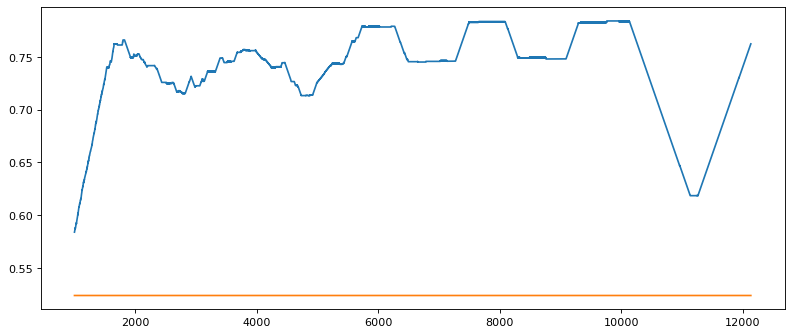

In [7]:

x =np.linspace(0,len(np.array(result.bid_history)),num=len(np.array(result.bid_history)))
agent_1 = np.array(result.bid_history)[:,0]
agent_2 = np.array(result.bid_history)[:,1]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(12, 5), dpi=80)
plt.plot(df['agent_1'].rolling(1000).mean())
plt.plot(df['agent_2'].rolling(1000).mean())

In [5]:

x =np.linspace(0,len(np.array(result.reward_history)),num=len(np.array(result.reward_history)))
agent_1 = np.array(result.reward_history)[:,0]
agent_2 = np.array(result.reward_history)[:,1]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(12, 5), dpi=80)
plt.plot(df['agent_1'].rolling(1000).mean())
plt.plot(df['agent_2'].rolling(1000).mean())

AttributeError: 'Results' object has no attribute 'reward_history'

# Heat map of prices for FPA


In [8]:
freq_values = np.zeros((len(result.env.action_space),len(result.env.action_space)))

for i in range(1000):
    print("iteration: ",i+1)
    result = main.run(alpha=1)
    agent1_last_price = result.bid_history[-1:][0][0]
    agent2_last_price = result.bid_history[-1:][0][1]
    index_of_agent1_price = np.where(result.env.action_space == agent1_last_price)[0][0]
    index_of_agent2_price = np.where(result.env.action_space == agent2_last_price)[0][0]
    freq_values[index_of_agent1_price][index_of_agent2_price] += 1
    clear_output()



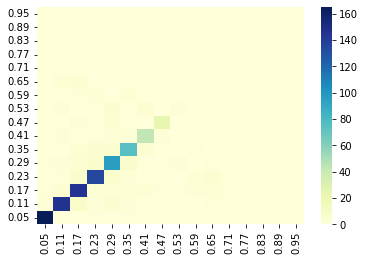

In [9]:
ax = sns.heatmap(freq_values,yticklabels=np.round(result.env.action_space,2), xticklabels=np.round(result.env.action_space,2),cmap="YlGnBu")
ax.invert_yaxis()

# Heat map of prices for SPA

In [ ]:
freq_values2 = np.zeros((len(result.env.action_space),len(result.env.action_space)))

for i in range(1000):
    print("iteration: ",i+1)
    result = main.run(alpha=2)
    agent1_last_price = result.bid_history[-1:][0][0]
    agent2_last_price = result.bid_history[-1:][0][1]
    index_of_agent1_price = np.where(result.env.action_space == agent1_last_price)[0][0]
    index_of_agent2_price = np.where(result.env.action_space == agent2_last_price)[0][0]
    freq_values2[index_of_agent1_price][index_of_agent2_price] += 1
    clear_output()


iteration:  1


 16%|█▌        | 161284/1000000 [00:48<04:49, 2893.77it/s]

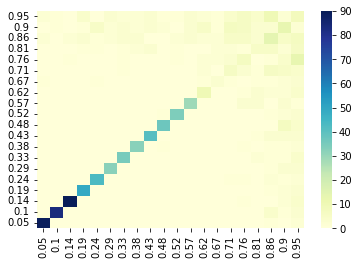

In [11]:
ax = sns.heatmap(freq_values2,yticklabels=np.round(result.env.action_space,2), xticklabels=np.round(result.env.action_space,2),cmap="YlGnBu")
ax.invert_yaxis()

In [21]:
freq_values2 = np.zeros((len(result.env.action_space),len(result.env.action_space)))

for i in range(10):
    print("iteration: ",i+1)
    result = main.run(alpha=2)
    agent1_last_price = result.bid_history[-1:][0][0]
    agent2_last_price = result.bid_history[-1:][0][1]
    index_of_agent1_price = np.where(result.env.action_space == agent1_last_price)[0][0]
    index_of_agent2_price = np.where(result.env.action_space == agent2_last_price)[0][0]
    freq_values2[index_of_agent1_price][index_of_agent2_price] += 1
    clear_output()


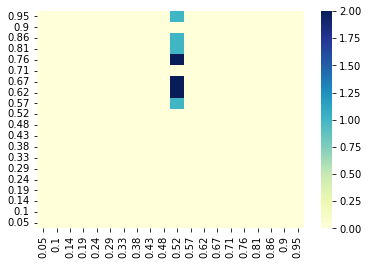

In [22]:
ax = sns.heatmap(freq_values2,yticklabels=np.round(result.env.action_space,2), xticklabels=np.round(result.env.action_space,2),cmap="YlGnBu")
ax.invert_yaxis()